Alvis's 'deep learning' env

# load library

In [1]:
import os, glob
import pickle
from tqdm import tqdm
from collections import Counter
import numpy as np

In [2]:
from pymongo import MongoClient
import xmlrpc.client
import json

# connect to server

In [222]:
client = MongoClient('mongodb://localhost:27017/')
db = client.smm695
proj = db.proj


# insert to database

In [4]:
def convert_datetime(obj):
    if isinstance(obj, xmlrpc.client.DateTime):
        return obj.value  # Extract the value from DateTime object
    return obj

def convert_document(document):
    if isinstance(document, dict):
        return {k: convert_document(v) for k, v in document.items()}
    elif isinstance(document, list):
        return [convert_document(item) for item in document]
    else:
        return convert_datetime(document)

In [17]:
pickle_dir = r'C:\Users\Alvis Cheung\Desktop\Bayes\Term 3\SMM695 Data Mgt\Project\archive-mozilla-bugs\.bugs'

# Initialize a list to accumulate converted documents
converted_documents = []

# Iterate through each pickle file in the directory
for filename in tqdm(os.listdir(pickle_dir)):
    if filename.endswith('.pickle'):
        file_path = os.path.join(pickle_dir, filename)

        # Load the pickle file and convert it into a Python object
        with open(file_path, 'rb') as handle:
            obj = pickle.load(handle)

        # Convert the object to a compatible format
        converted_obj = convert_document(obj)

        # Append the converted document to the list
        converted_documents.append(converted_obj)


        # Insert documents in batches (e.g., 1000 documents per batch)
        if len(converted_documents) == 1000:
            # Serialize the batch as JSON
            json_data = json.dumps(converted_documents)

            # Insert the JSON data as documents into the MongoDB collection
            proj.insert_many(json.loads(json_data))

            # Clear the list for the next batch
            converted_documents = []
    

# Insert the remaining documents in the last batch
if converted_documents:
    # Serialize the remaining batch as JSON
    json_data = json.dumps(converted_documents)

    # Insert the JSON data as documents into the MongoDB collection
    proj.insert_many(json.loads(json_data))

# Close the MongoDB connection
client.close()

100%|██████████| 215172/215172 [38:49<00:00, 92.37it/s]  


# exploring: cf_status_ & cf_tracking_ fields

## field names

In [4]:
# get all field names in each document
fieldNameLL = []
for doc in tqdm(proj.find()):
    
    fieldNameLL.append(list(doc.keys()))

fieldNameLL

215172it [01:15, 2852.44it/s]


[['_id', 'id', 'err', 'tracking_flags'],
 ['_id', 'id', 'err', 'tracking_flags'],
 ['_id', 'id', 'err', 'tracking_flags'],
 ['_id', 'id', 'err', 'tracking_flags'],
 ['_id',
  'url',
  'duplicates',
  'classification',
  'mentors',
  'component',
  'cf_user_story',
  'target_milestone',
  'op_sys',
  'comment_count',
  'is_cc_accessible',
  'cf_qa_whiteboard',
  'flags',
  'resolution',
  'version',
  'cf_fx_points',
  'cc',
  'mentors_detail',
  'id',
  'regressions',
  'priority',
  'is_creator_accessible',
  'assigned_to_detail',
  'is_confirmed',
  'blocks',
  'assigned_to',
  'product',
  'creation_time',
  'see_also',
  'cf_cab_review',
  'qa_contact',
  'severity',
  'creator',
  'cc_detail',
  'votes',
  'creator_detail',
  'update_token',
  'cf_last_resolved',
  'regressed_by',
  'status',
  'last_change_time',
  'whiteboard',
  'platform',
  'depends_on',
  'summary',
  'groups',
  'is_open',
  'type',
  'cf_fx_iteration',
  'keywords',
  'bugs',
  'comments',
  'tracking_flag

In [5]:
# flatten the list of lists
fieldName = [item for sublist in fieldNameLL for item in sublist]
fieldName

['_id',
 'id',
 'err',
 'tracking_flags',
 '_id',
 'id',
 'err',
 'tracking_flags',
 '_id',
 'id',
 'err',
 'tracking_flags',
 '_id',
 'id',
 'err',
 'tracking_flags',
 '_id',
 'url',
 'duplicates',
 'classification',
 'mentors',
 'component',
 'cf_user_story',
 'target_milestone',
 'op_sys',
 'comment_count',
 'is_cc_accessible',
 'cf_qa_whiteboard',
 'flags',
 'resolution',
 'version',
 'cf_fx_points',
 'cc',
 'mentors_detail',
 'id',
 'regressions',
 'priority',
 'is_creator_accessible',
 'assigned_to_detail',
 'is_confirmed',
 'blocks',
 'assigned_to',
 'product',
 'creation_time',
 'see_also',
 'cf_cab_review',
 'qa_contact',
 'severity',
 'creator',
 'cc_detail',
 'votes',
 'creator_detail',
 'update_token',
 'cf_last_resolved',
 'regressed_by',
 'status',
 'last_change_time',
 'whiteboard',
 'platform',
 'depends_on',
 'summary',
 'groups',
 'is_open',
 'type',
 'cf_fx_iteration',
 'keywords',
 'bugs',
 'comments',
 'tracking_flags',
 '_id',
 'classification',
 'cf_status_thunde

In [6]:
len(fieldName)

14108415

In [7]:
# get all unique field names
fieldNameUnique = set(fieldName)
fieldNameUnique

{'_id',
 'alias',
 'assigned_to',
 'assigned_to_detail',
 'blocks',
 'bugs',
 'cc',
 'cc_detail',
 'cf_a11y_review_project_flag',
 'cf_accessibility_severity',
 'cf_blocking_20',
 'cf_blocking_b2g',
 'cf_blocking_fennec',
 'cf_blocking_kilimanjaro',
 'cf_blocking_thunderbird30',
 'cf_blocking_thunderbird31',
 'cf_blocking_thunderbird33',
 'cf_cab_review',
 'cf_crash_signature',
 'cf_feature_b2g',
 'cf_fx_iteration',
 'cf_fx_points',
 'cf_has_str',
 'cf_install_update_workflow',
 'cf_last_resolved',
 'cf_locale',
 'cf_performance_impact',
 'cf_qa_whiteboard',
 'cf_status_191',
 'cf_status_192',
 'cf_status_20',
 'cf_status_b2g_1_4',
 'cf_status_b2g_2_0',
 'cf_status_b2g_2_1',
 'cf_status_b2g_2_1_s',
 'cf_status_esr10',
 'cf_status_firefox100',
 'cf_status_firefox101',
 'cf_status_firefox107',
 'cf_status_firefox110',
 'cf_status_firefox111',
 'cf_status_firefox113',
 'cf_status_firefox114',
 'cf_status_firefox115',
 'cf_status_firefox116',
 'cf_status_firefox13',
 'cf_status_firefox16',

## field names (status)

In [8]:
# get all field names of "cf_status_..."
statusField = [field for field in list(fieldName) if "cf_status_" in field]
statusField.sort()
statusField

['cf_status_191',
 'cf_status_191',
 'cf_status_191',
 'cf_status_191',
 'cf_status_192',
 'cf_status_192',
 'cf_status_192',
 'cf_status_192',
 'cf_status_20',
 'cf_status_20',
 'cf_status_20',
 'cf_status_20',
 'cf_status_20',
 'cf_status_20',
 'cf_status_20',
 'cf_status_b2g_1_4',
 'cf_status_b2g_2_0',
 'cf_status_b2g_2_1',
 'cf_status_b2g_2_1',
 'cf_status_b2g_2_1',
 'cf_status_b2g_2_1_s',
 'cf_status_esr10',
 'cf_status_firefox100',
 'cf_status_firefox100',
 'cf_status_firefox100',
 'cf_status_firefox101',
 'cf_status_firefox107',
 'cf_status_firefox110',
 'cf_status_firefox111',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_status_firefox113',
 'cf_sta

In [9]:
set(statusField)

{'cf_status_191',
 'cf_status_192',
 'cf_status_20',
 'cf_status_b2g_1_4',
 'cf_status_b2g_2_0',
 'cf_status_b2g_2_1',
 'cf_status_b2g_2_1_s',
 'cf_status_esr10',
 'cf_status_firefox100',
 'cf_status_firefox101',
 'cf_status_firefox107',
 'cf_status_firefox110',
 'cf_status_firefox111',
 'cf_status_firefox113',
 'cf_status_firefox114',
 'cf_status_firefox115',
 'cf_status_firefox116',
 'cf_status_firefox13',
 'cf_status_firefox16',
 'cf_status_firefox17',
 'cf_status_firefox18',
 'cf_status_firefox20',
 'cf_status_firefox21',
 'cf_status_firefox22',
 'cf_status_firefox23',
 'cf_status_firefox24',
 'cf_status_firefox28',
 'cf_status_firefox29',
 'cf_status_firefox30',
 'cf_status_firefox31',
 'cf_status_firefox35',
 'cf_status_firefox38',
 'cf_status_firefox39',
 'cf_status_firefox40',
 'cf_status_firefox41',
 'cf_status_firefox42',
 'cf_status_firefox43',
 'cf_status_firefox44',
 'cf_status_firefox45',
 'cf_status_firefox47',
 'cf_status_firefox48',
 'cf_status_firefox49',
 'cf_status_

In [10]:
# we can the field names are mostly either _firefox, _seamonkey, _thunderbird (3 mozilla projects)
# count how many fields for each project
def countProj(list):

    projects = ['thunderbird', 'seamonkey', 'firefox']
    count = {'thunderbird':0, 'seamonkey':0, 'firefox':0, 'other':0}

    for i in list:
        p = 0
        for project in projects:
            if project in i:
                count[project] += 1
                p = 1
        if p == 0:
            count['other'] += 1

    return count

countStatus = countProj(statusField)
countStatusUnique = countProj(list(set(statusField)))
countStatusUnique, countStatus

({'thunderbird': 38, 'seamonkey': 23, 'firefox': 78, 'other': 8},
 {'thunderbird': 380526, 'seamonkey': 176404, 'firefox': 340216, 'other': 22})

In [11]:
# extract the sub-project code
def listProj(list,flagType):
    projects = ['thunderbird', 'seamonkey', 'firefox']
    listVer = {'thunderbird':[], 'seamonkey':[], 'firefox':[], 'other':[]}

    for i in list:
        p = 0
        for project in projects:
            if project in i:
                listVer[project].append(i.replace('cf_'+flagType+'_'+project, '').strip("_"))
                p = 1
        if p == 0:
            listVer['other'].append(i.replace('cf_'+flagType,'').strip("_"))

    #listVer = {k: list(set(v)) for k,v in listVer.items()}
    return listVer

testing = {k: list(set(v)) for k,v in listProj(statusField, 'status').items()}
testing

{'thunderbird': ['53',
  '115',
  'esr38',
  '39',
  '34',
  '45',
  '52',
  '42',
  '65',
  '38',
  '84',
  '114',
  'esr102',
  '36',
  '83',
  'esr115',
  '64',
  '87',
  '57',
  'esr91',
  '58',
  '31',
  '60',
  '91',
  '106',
  '40',
  '85',
  '63',
  '44',
  '46',
  'esr60',
  '113',
  'esr78',
  '116',
  '93',
  '41',
  '61',
  '92'],
 'seamonkey': ['26',
  '243',
  '232',
  '257esr',
  '212',
  '214',
  '210',
  '23',
  '263',
  '239',
  '25',
  '215',
  '241',
  '240',
  '227',
  '253',
  '216',
  '242',
  '249',
  '21',
  '24',
  '226',
  '235'],
 'firefox': ['78',
  'esr45',
  '47',
  'esr102',
  '96',
  '22',
  '68',
  '64',
  '62',
  '88',
  '17',
  '113',
  '71',
  '116',
  '49',
  '53',
  '115',
  '39',
  '28',
  '6',
  '52',
  '73',
  '38',
  '56',
  '66',
  '70',
  '111',
  '83',
  '30',
  'esr115',
  '55',
  '18',
  '57',
  '31',
  '21',
  '85',
  '13',
  'esr78',
  'esr60',
  '41',
  '60',
  '61',
  '45',
  '65',
  '69',
  '29',
  '110',
  '59',
  '100',
  '58',
  '

## field names (tracking)

In [12]:
# doing the same for "cf_tracking_..."
trackingField = [field for field in list(fieldName) if "cf_tracking_" in field]
trackingField.sort()
trackingField

['cf_tracking_b2g',
 'cf_tracking_b2g',
 'cf_tracking_b2g',
 'cf_tracking_b2g',
 'cf_tracking_b2g18',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push',
 'cf_tracking_bmo_push'

In [13]:
set(trackingField)

{'cf_tracking_b2g',
 'cf_tracking_b2g18',
 'cf_tracking_bmo_push',
 'cf_tracking_firefox10',
 'cf_tracking_firefox11',
 'cf_tracking_firefox113',
 'cf_tracking_firefox114',
 'cf_tracking_firefox115',
 'cf_tracking_firefox116',
 'cf_tracking_firefox13',
 'cf_tracking_firefox22',
 'cf_tracking_firefox23',
 'cf_tracking_firefox25',
 'cf_tracking_firefox27',
 'cf_tracking_firefox30',
 'cf_tracking_firefox31',
 'cf_tracking_firefox5',
 'cf_tracking_firefox56',
 'cf_tracking_firefox57',
 'cf_tracking_firefox6',
 'cf_tracking_firefox7',
 'cf_tracking_firefox71',
 'cf_tracking_firefox_esr102',
 'cf_tracking_firefox_esr115',
 'cf_tracking_firefox_esr31',
 'cf_tracking_firefox_relnote',
 'cf_tracking_seamonkey229',
 'cf_tracking_seamonkey253',
 'cf_tracking_seamonkey257esr',
 'cf_tracking_thunderbird_114',
 'cf_tracking_thunderbird_115',
 'cf_tracking_thunderbird_116',
 'cf_tracking_thunderbird_38',
 'cf_tracking_thunderbird_45',
 'cf_tracking_thunderbird_91',
 'cf_tracking_thunderbird_93',
 'cf

In [14]:
# we can the field names are mostly either _firefox, _seamonkey, _thunderbird (3 mozilla projects)
# count how many fields for each project
countTracking = countProj(trackingField)
countTrackingUnique = countProj(list(set(trackingField)))
countTrackingUnique, countTracking

({'thunderbird': 13, 'seamonkey': 3, 'firefox': 23, 'other': 3},
 {'thunderbird': 380481, 'seamonkey': 176379, 'firefox': 470225, 'other': 992})

In [15]:
# extract the sub-project code
testing2 = {k: list(set(v)) for k,v in listProj(trackingField, 'tracking').items()}
testing2

{'thunderbird': ['38',
  '115',
  '114',
  'esr115',
  'esr38',
  'esr78',
  'esr60',
  '45',
  '93',
  '116',
  '91',
  'esr91',
  'esr102'],
 'seamonkey': ['229', '257esr', '253'],
 'firefox': ['115',
  '6',
  '23',
  '56',
  '5',
  '114',
  'esr31',
  '7',
  '25',
  'esr102',
  '10',
  '11',
  'relnote',
  '22',
  '30',
  'esr115',
  '27',
  '57',
  '31',
  '13',
  '113',
  '71',
  '116'],
 'other': ['b2g18', 'bmo_push', 'b2g']}

## field names (status-tracking match)

In [63]:
# get all documents with 'cf_status_' or 'cf_tracking_' field
fieldNameLLFiltered = [[field for field in doc if ("cf_tracking_" in field) or ("cf_status_" in field)] for doc in fieldNameLL]
fieldNameLLFiltered

[[],
 [],
 [],
 [],
 [],
 ['cf_status_thunderbird_esr91',
  'cf_status_thunderbird_esr102',
  'cf_tracking_thunderbird_esr102',
  'cf_tracking_firefox_esr115',
  'cf_tracking_firefox115',
  'cf_status_firefox_esr115',
  'cf_status_firefox_esr102',
  'cf_status_firefox116',
  'cf_tracking_firefox_relnote',
  'cf_tracking_firefox114',
  'cf_tracking_firefox116',
  'cf_status_firefox114',
  'cf_status_firefox115',
  'cf_tracking_thunderbird_esr91',
  'cf_tracking_firefox_esr102'],
 [],
 ['cf_tracking_seamonkey257esr',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey257esr'],
 ['cf_tracking_bmo_push'],
 ['cf_tracking_seamonkey257esr',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey257esr'],
 ['cf_status_seamonkey257esr',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey257esr'],
 ['cf_status_thunderbird_esr91',
  'cf_tracking_thunderbird_esr102',
  'cf_status_thunderbird_esr102',
  'cf_trackin

In [64]:
testing = [doc for doc in fieldNameLLFiltered if len(doc) > 0]

testing

[['cf_status_thunderbird_esr91',
  'cf_status_thunderbird_esr102',
  'cf_tracking_thunderbird_esr102',
  'cf_tracking_firefox_esr115',
  'cf_tracking_firefox115',
  'cf_status_firefox_esr115',
  'cf_status_firefox_esr102',
  'cf_status_firefox116',
  'cf_tracking_firefox_relnote',
  'cf_tracking_firefox114',
  'cf_tracking_firefox116',
  'cf_status_firefox114',
  'cf_status_firefox115',
  'cf_tracking_thunderbird_esr91',
  'cf_tracking_firefox_esr102'],
 ['cf_tracking_seamonkey257esr',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey257esr'],
 ['cf_tracking_bmo_push'],
 ['cf_tracking_seamonkey257esr',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey257esr'],
 ['cf_status_seamonkey257esr',
  'cf_tracking_seamonkey253',
  'cf_status_seamonkey253',
  'cf_tracking_seamonkey257esr'],
 ['cf_status_thunderbird_esr91',
  'cf_tracking_thunderbird_esr102',
  'cf_status_thunderbird_esr102',
  'cf_tracking_thunderbird_esr115',
  'cf_s

In [67]:
# extract projectID with either status or tracking
noMatch = \
[
    [k for k,v in dict(Counter([field.replace("cf_status_", "").replace("cf_tracking_", "") for field in doc])).items() if v==1]
    for doc in testing
]
noMatch

[['firefox_relnote'],
 [],
 ['bmo_push'],
 [],
 [],
 ['firefox_relnote'],
 [],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 [],
 ['firefox_relnote'],
 [],
 [],
 [],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 [],
 ['firefox_relnote'],
 [],
 [],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 [],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 [],
 [],
 [],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 [],
 ['firefox_relnote'],
 ['fir

In [68]:
# 'firefox_relnote' & 'bmo_push' only have 'cf_tracking_...'
[doc for doc in noMatch if len(doc)>1 and ('firefox_relnote' not in doc and 'bmo_push' not in doc)]


[['seamonkey227', 'seamonkey226'],
 ['seamonkey214', 'seamonkey215'],
 ['seamonkey25', 'seamonkey26', 'seamonkey23', 'seamonkey24'],
 ['firefox35', 'seamonkey232'],
 ['seamonkey229', 'b2g'],
 ['seamonkey242', 'seamonkey241', 'seamonkey240'],
 ['thunderbird_61', 'thunderbird_60'],
 ['seamonkey263', 'seamonkey249']]

## field values

In [16]:
# check unique values for each field
valTrack = {}
for i in tqdm(list(set(trackingField))):
    valTrack[i] = proj.distinct(i)
valTrack

100%|██████████| 42/42 [00:19<00:00,  2.20it/s]


{'cf_tracking_firefox25': ['-'],
 'cf_tracking_firefox_esr31': ['-'],
 'cf_tracking_firefox5': ['-'],
 'cf_tracking_bmo_push': ['---'],
 'cf_tracking_thunderbird_91': ['+'],
 'cf_tracking_firefox27': ['-'],
 'cf_tracking_firefox56': ['-'],
 'cf_tracking_seamonkey229': ['?'],
 'cf_tracking_firefox31': ['-'],
 'cf_tracking_firefox_relnote': ['-',
  '---',
  '28+',
  '38+',
  '41+',
  '71+',
  '96+'],
 'cf_tracking_thunderbird_115': ['---'],
 'cf_tracking_thunderbird_esr38': ['41+'],
 'cf_tracking_firefox115': ['---'],
 'cf_tracking_firefox_esr115': ['---'],
 'cf_tracking_firefox114': ['---'],
 'cf_tracking_firefox11': ['-'],
 'cf_tracking_thunderbird_45': ['+'],
 'cf_tracking_thunderbird_116': ['---'],
 'cf_tracking_thunderbird_esr60': ['63+', '64+'],
 'cf_tracking_b2g18': ['-'],
 'cf_tracking_firefox_esr102': ['---'],
 'cf_tracking_thunderbird_93': ['+'],
 'cf_tracking_firefox10': ['-'],
 'cf_tracking_thunderbird_esr115': ['---'],
 'cf_tracking_firefox113': ['---'],
 'cf_tracking_thunde

In [17]:
# check unique values for each field
valStatus = {}
for i in tqdm(list(set(statusField))):
    valStatus[i] = proj.distinct(i)
valStatus

100%|██████████| 147/147 [01:05<00:00,  2.23it/s]


{'cf_status_firefox53': ['fixed'],
 'cf_status_thunderbird_45': ['fixed'],
 'cf_status_thunderbird_58': ['fixed'],
 'cf_status_thunderbird_114': ['---'],
 'cf_status_thunderbird_34': ['fixed'],
 'cf_status_firefox61': ['fixed', 'wontfix'],
 'cf_status_thunderbird_84': ['wontfix'],
 'cf_status_firefox52': ['verified'],
 'cf_status_thunderbird_52': ['fixed'],
 'cf_status_firefox21': ['unaffected'],
 'cf_status_seamonkey239': ['affected'],
 'cf_status_firefox30': ['fixed', 'verified'],
 'cf_status_seamonkey25': ['wontfix'],
 'cf_status_firefox_esr60': ['wontfix'],
 'cf_status_thunderbird_57': ['fixed'],
 'cf_status_firefox101': ['fixed'],
 'cf_status_firefox47': ['affected', 'fixed'],
 'cf_status_firefox55': ['wontfix'],
 'cf_status_thunderbird_113': ['wontfix'],
 'cf_status_firefox43': ['affected', 'fixed'],
 'cf_status_firefox86': ['wontfix'],
 'cf_status_seamonkey226': ['fixed'],
 'cf_status_thunderbird_36': ['fixed'],
 'cf_status_thunderbird_53': ['fixed'],
 'cf_status_firefox116': ['

In [18]:
# number of cf_tracking columns having these entries
Counter([i for k,v in valTrack.items() for i in v])

Counter({'-': 14,
         '---': 16,
         '+': 14,
         '?': 2,
         '28+': 1,
         '38+': 1,
         '41+': 2,
         '71+': 1,
         '96+': 1,
         '63+': 1,
         '64+': 1,
         'backlog': 1})

In [19]:
# number of cf_status columns having these entries
Counter([i for k,v in valStatus.items() for i in v])

Counter({'fixed': 77,
         '---': 14,
         'wontfix': 37,
         'verified': 16,
         'unaffected': 4,
         'affected': 28,
         'disabled': 3,
         '?': 6,
         '.16-fixed': 1,
         '.3-fixed': 1,
         'wanted': 3,
         'fix-optional': 1,
         '.1-fixed': 1,
         '.13-fixed': 1,
         'beta2-fixed': 1,
         'rc1-fixed': 1})

### by project count

In [20]:
Counter([i for k,v in valTrack.items() for i in v if 'thunderbird' in k])

Counter({'+': 7, '---': 6, '41+': 1, '63+': 1, '64+': 1})

In [21]:
Counter([i for k,v in valTrack.items() for i in v if 'firefox' in k])

Counter({'-': 13,
         '---': 7,
         '28+': 1,
         '38+': 1,
         '41+': 1,
         '71+': 1,
         '96+': 1,
         '+': 6})

In [22]:
Counter([i for k,v in valTrack.items() for i in v if 'seamonkey' in k])

Counter({'?': 2, '---': 2, '+': 1})

## field values by field

In [23]:
# extract all entries under each cf_status field
statusVal = {}
for field in tqdm(list(set(statusField))):
    result = proj.find({field: {"$exists": True}}, \
                        {"_id":0, field:1} )
                        
    statusVal[field] = [doc[field] for doc in result]
statusVal

100%|██████████| 147/147 [01:01<00:00,  2.38it/s]


{'cf_status_firefox53': ['fixed'],
 'cf_status_thunderbird_45': ['fixed', 'fixed', 'fixed'],
 'cf_status_thunderbird_58': ['fixed'],
 'cf_status_thunderbird_114': ['---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
 

In [24]:
# extract all entries under each cf_tracking field
trackVal = {}
for field in tqdm(list(set(trackingField))):
    result = proj.find({field: {"$exists": True}}, \
                        {"_id":0, field:1} )
                        
    trackVal[field] = [doc[field] for doc in result]
trackVal

100%|██████████| 42/42 [00:18<00:00,  2.31it/s]


{'cf_tracking_firefox25': ['-'],
 'cf_tracking_firefox_esr31': ['-'],
 'cf_tracking_firefox5': ['-'],
 'cf_tracking_bmo_push': ['---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
  '---',
 

In [25]:
# count each entry for each cf_track field
for k,v in trackVal.items():
    print(Counter(v))

Counter({'-': 1})
Counter({'-': 1})
Counter({'-': 1})
Counter({'---': 987})
Counter({'+': 1})
Counter({'-': 1})
Counter({'-': 1})
Counter({'?': 1})
Counter({'-': 1})
Counter({'---': 130103, '28+': 1, '71+': 1, '38+': 1, '96+': 1, '41+': 1, '-': 1})
Counter({'---': 18873})
Counter({'41+': 1})
Counter({'---': 83954})
Counter({'---': 3859})
Counter({'---': 83954})
Counter({'-': 1})
Counter({'+': 2})
Counter({'---': 18873})
Counter({'63+': 1, '64+': 1})
Counter({'-': 1})
Counter({'---': 84376})
Counter({'+': 1})
Counter({'-': 1})
Counter({'---': 91706})
Counter({'---': 49})
Counter({'+': 2})
Counter({'---': 116071, '+': 2})
Counter({'+': 1})
Counter({'---': 88187, '?': 2})
Counter({'+': 1})
Counter({'-': 1})
Counter({'+': 1})
Counter({'-': 2})
Counter({'---': 18873})
Counter({'+': 1, '-': 1})
Counter({'---': 116071, '+': 2})
Counter({'---': 83905})
Counter({'---': 88184, '+': 5})
Counter({'backlog': 4})
Counter({'+': 1})
Counter({'+': 1})
Counter({'-': 1, '+': 1})


In [26]:
# count each entry for each cf_status field
for k,v in statusVal.items():
    print(Counter(v))

Counter({'fixed': 1})
Counter({'fixed': 3})
Counter({'fixed': 1})
Counter({'---': 18873})
Counter({'fixed': 1})
Counter({'wontfix': 1, 'fixed': 1})
Counter({'wontfix': 1})
Counter({'verified': 2})
Counter({'fixed': 1})
Counter({'unaffected': 1})
Counter({'affected': 1})
Counter({'verified': 1, 'fixed': 1})
Counter({'wontfix': 1})
Counter({'wontfix': 2})
Counter({'fixed': 1})
Counter({'fixed': 1})
Counter({'affected': 3, 'fixed': 1})
Counter({'wontfix': 1})
Counter({'wontfix': 1})
Counter({'fixed': 2, 'affected': 1})
Counter({'wontfix': 1})
Counter({'fixed': 1})
Counter({'fixed': 1})
Counter({'fixed': 1})
Counter({'---': 83905})
Counter({'fixed': 1})
Counter({'---': 91704})
Counter({'fixed': 2})
Counter({'wontfix': 1})
Counter({'affected': 1})
Counter({'affected': 3})
Counter({'fixed': 1, 'affected': 1})
Counter({'fixed': 1})
Counter({'disabled': 1})
Counter({'disabled': 1})
Counter({'fixed': 2})
Counter({'---': 18873})
Counter({'---': 83953, 'fixed': 1})
Counter({'?': 1})
Counter({'won

# re-structuring

## split out collections

In [ ]:
# split out the fields for the 'tracking' section, into collection 'Tracking'

""" js code run in mongoshell

var cursor = db.proj.find({}, 
{'id': 1,
 '_id': 0,
 'status': 1,
 'resolution': 1,
 'dupe_of': 1,
 'duplicates': 1,
 'target_milestone': 1,
 'cf_fx_iteration': 1,
 'cf_accessibility_severity': 1,
 'cf_a11y_review_project_flag': 1,
 'cf_webcompat_priority': 1,
 'cf_performance_impact': 1,
 'cf_status_191': 1,
 'cf_status_192': 1,
 'cf_status_20': 1,
 'cf_status_b2g_1_4': 1,
 'cf_status_b2g_2_0': 1,
 'cf_status_b2g_2_1': 1,
 'cf_status_b2g_2_1_s': 1,
 'cf_status_esr10': 1,
 'cf_status_firefox100': 1,
 'cf_status_firefox101': 1,
 'cf_status_firefox107': 1,
 'cf_status_firefox110': 1,
 'cf_status_firefox111': 1,
 'cf_status_firefox113': 1,
 'cf_status_firefox114': 1,
 'cf_status_firefox115': 1,
 'cf_status_firefox116': 1,
 'cf_status_firefox13': 1,
 'cf_status_firefox16': 1,
 'cf_status_firefox17': 1,
 'cf_status_firefox18': 1,
 'cf_status_firefox20': 1,
 'cf_status_firefox21': 1,
 'cf_status_firefox22': 1,
 'cf_status_firefox23': 1,
 'cf_status_firefox24': 1,
 'cf_status_firefox28': 1,
 'cf_status_firefox29': 1,
 'cf_status_firefox30': 1,
 'cf_status_firefox31': 1,
 'cf_status_firefox35': 1,
 'cf_status_firefox38': 1,
 'cf_status_firefox39': 1,
 'cf_status_firefox40': 1,
 'cf_status_firefox41': 1,
 'cf_status_firefox42': 1,
 'cf_status_firefox43': 1,
 'cf_status_firefox44': 1,
 'cf_status_firefox45': 1,
 'cf_status_firefox47': 1,
 'cf_status_firefox48': 1,
 'cf_status_firefox49': 1,
 'cf_status_firefox51': 1,
 'cf_status_firefox52': 1,
 'cf_status_firefox53': 1,
 'cf_status_firefox54': 1,
 'cf_status_firefox55': 1,
 'cf_status_firefox56': 1,
 'cf_status_firefox57': 1,
 'cf_status_firefox58': 1,
 'cf_status_firefox59': 1,
 'cf_status_firefox6': 1,
 'cf_status_firefox60': 1,
 'cf_status_firefox61': 1,
 'cf_status_firefox62': 1,
 'cf_status_firefox63': 1,
 'cf_status_firefox64': 1,
 'cf_status_firefox65': 1,
 'cf_status_firefox66': 1,
 'cf_status_firefox68': 1,
 'cf_status_firefox69': 1,
 'cf_status_firefox70': 1,
 'cf_status_firefox71': 1,
 'cf_status_firefox73': 1,
 'cf_status_firefox76': 1,
 'cf_status_firefox77': 1,
 'cf_status_firefox78': 1,
 'cf_status_firefox83': 1,
 'cf_status_firefox85': 1,
 'cf_status_firefox86': 1,
 'cf_status_firefox87': 1,
 'cf_status_firefox88': 1,
 'cf_status_firefox89': 1,
 'cf_status_firefox90': 1,
 'cf_status_firefox91': 1,
 'cf_status_firefox94': 1,
 'cf_status_firefox95': 1,
 'cf_status_firefox96': 1,
 'cf_status_firefox_esr102': 1,
 'cf_status_firefox_esr115': 1,
 'cf_status_firefox_esr31': 1,
 'cf_status_firefox_esr45': 1,
 'cf_status_firefox_esr52': 1,
 'cf_status_firefox_esr60': 1,
 'cf_status_firefox_esr78': 1,
 'cf_status_firefox_esr91': 1,
 'cf_status_seamonkey21': 1,
 'cf_status_seamonkey210': 1,
 'cf_status_seamonkey212': 1,
 'cf_status_seamonkey214': 1,
 'cf_status_seamonkey215': 1,
 'cf_status_seamonkey216': 1,
 'cf_status_seamonkey226': 1,
 'cf_status_seamonkey227': 1,
 'cf_status_seamonkey23': 1,
 'cf_status_seamonkey232': 1,
 'cf_status_seamonkey235': 1,
 'cf_status_seamonkey239': 1,
 'cf_status_seamonkey24': 1,
 'cf_status_seamonkey240': 1,
 'cf_status_seamonkey241': 1,
 'cf_status_seamonkey242': 1,
 'cf_status_seamonkey243': 1,
 'cf_status_seamonkey249': 1,
 'cf_status_seamonkey25': 1,
 'cf_status_seamonkey253': 1,
 'cf_status_seamonkey257esr': 1,
 'cf_status_seamonkey26': 1,
 'cf_status_seamonkey263': 1,
 'cf_status_thunderbird31': 1,
 'cf_status_thunderbird_106': 1,
 'cf_status_thunderbird_113': 1,
 'cf_status_thunderbird_114': 1,
 'cf_status_thunderbird_115': 1,
 'cf_status_thunderbird_116': 1,
 'cf_status_thunderbird_34': 1,
 'cf_status_thunderbird_36': 1,
 'cf_status_thunderbird_38': 1,
 'cf_status_thunderbird_39': 1,
 'cf_status_thunderbird_40': 1,
 'cf_status_thunderbird_41': 1,
 'cf_status_thunderbird_42': 1,
 'cf_status_thunderbird_44': 1,
 'cf_status_thunderbird_45': 1,
 'cf_status_thunderbird_46': 1,
 'cf_status_thunderbird_52': 1,
 'cf_status_thunderbird_53': 1,
 'cf_status_thunderbird_57': 1,
 'cf_status_thunderbird_58': 1,
 'cf_status_thunderbird_60': 1,
 'cf_status_thunderbird_61': 1,
 'cf_status_thunderbird_63': 1,
 'cf_status_thunderbird_64': 1,
 'cf_status_thunderbird_65': 1,
 'cf_status_thunderbird_83': 1,
 'cf_status_thunderbird_84': 1,
 'cf_status_thunderbird_85': 1,
 'cf_status_thunderbird_87': 1,
 'cf_status_thunderbird_91': 1,
 'cf_status_thunderbird_92': 1,
 'cf_status_thunderbird_93': 1,
 'cf_status_thunderbird_esr102': 1,
 'cf_status_thunderbird_esr115': 1,
 'cf_status_thunderbird_esr38': 1,
 'cf_status_thunderbird_esr60': 1,
 'cf_status_thunderbird_esr78': 1,
 'cf_status_thunderbird_esr91': 1,
 'cf_tracking_b2g': 1,
 'cf_tracking_b2g18': 1,
 'cf_tracking_bmo_push': 1,
 'cf_tracking_firefox10': 1,
 'cf_tracking_firefox11': 1,
 'cf_tracking_firefox113': 1,
 'cf_tracking_firefox114': 1,
 'cf_tracking_firefox115': 1,
 'cf_tracking_firefox116': 1,
 'cf_tracking_firefox13': 1,
 'cf_tracking_firefox22': 1,
 'cf_tracking_firefox23': 1,
 'cf_tracking_firefox25': 1,
 'cf_tracking_firefox27': 1,
 'cf_tracking_firefox30': 1,
 'cf_tracking_firefox31': 1,
 'cf_tracking_firefox5': 1,
 'cf_tracking_firefox56': 1,
 'cf_tracking_firefox57': 1,
 'cf_tracking_firefox6': 1,
 'cf_tracking_firefox7': 1,
 'cf_tracking_firefox71': 1,
 'cf_tracking_firefox_esr102': 1,
 'cf_tracking_firefox_esr115': 1,
 'cf_tracking_firefox_esr31': 1,
 'cf_tracking_firefox_relnote': 1,
 'cf_tracking_seamonkey229': 1,
 'cf_tracking_seamonkey253': 1,
 'cf_tracking_seamonkey257esr': 1,
 'cf_tracking_thunderbird_114': 1,
 'cf_tracking_thunderbird_115': 1,
 'cf_tracking_thunderbird_116': 1,
 'cf_tracking_thunderbird_38': 1,
 'cf_tracking_thunderbird_45': 1,
 'cf_tracking_thunderbird_91': 1,
 'cf_tracking_thunderbird_93': 1,
 'cf_tracking_thunderbird_esr102': 1,
 'cf_tracking_thunderbird_esr115': 1,
 'cf_tracking_thunderbird_esr38': 1,
 'cf_tracking_thunderbird_esr60': 1,
 'cf_tracking_thunderbird_esr78': 1,
 'cf_tracking_thunderbird_esr91': 1});


while (cursor.hasNext()) {
  var document = cursor.next();
  db.Tracking.insertOne(document);
}

## cf_status_, cf_tracking_

In [112]:
Tracking = db.Tracking

In [5]:
from pprint import pprint as pp
from pymongo import UpdateOne

In [80]:
keys = Tracking.find({'id': 175175})
a = {}

for i in keys:
    a = [{'Product': k.replace("cf_status_",""),
          'Status': v}
        
         

         for k,v in i.items()
         if "cf_status_" in k]

a


[{'Product': 'seamonkey215', 'Status': 'fixed'},
 {'Product': 'seamonkey257esr', 'Status': '---'},
 {'Product': 'seamonkey253', 'Status': '---'}]

In [11]:
#=============== THIS TAKES ME SO LONG TO RUN =====================

# combine all the cf_status_ and cf_tracking_ fields by product, in a dictionary form
# {
#   version: '115',
#   status: '---',
#   tracking: '---'
# }

projects = ['thunderbird', 'seamonkey', 'firefox']
#updated_docs = 0

requests = []


# loop for all the found documents
for i in tqdm(Tracking.find({'tracking_flags': {'$exists': False}})):
#for i in tqdm(Tracking.find({'id': 0})):
    a = {'thunderbird':[], 'seamonkey':[], 'firefox':[], 'other':[]}

    # loop for all keys (fields) in the dictionary (document)
    # sorted the dictionary by the key, so
    # cf_status_.. -> cf_tracking_..
    for k,v in dict(sorted(i.items())).items():

        # if the field name is like 'cf_status_' or 'cf_tracking_'
        if 'cf_status_' in k or 'cf_tracking_' in k:

            flag = 0

            # if the project is included in the field name ('cf_status_firefox115')
            for project in projects:
                if project in k:

                #======== code block START ====================================================
                    # if cf_status_..., then store a new dict in the project list
                        # eg {'Version': '115', 'Status': '---'}
                    if 'status' in k:
                        a[project].append(
                            {'Version': k.replace('cf_status_'+project,'').strip('_'),
                            'Status': v}
                            )
                        
                    # else (cf_tracking_...)
                    else:
                        # assuming hv a status-tracking match,
                        # add the tracking info to the existing dict
                            # eg {'Version': '115', 'Status': '---', 'Tracking': '---}
                        try:
                            next(item for item in a[project]
                                if item['Version'] == \
                                k.replace('cf_tracking_'+project,'').strip('_'))['Tracking'] = v
                        # if no match, then add a new dict into the project list
                            # eg {'Version': '115', 'Tracking': '---}
                        except StopIteration:
                            a[project].append(
                                {'Version': k.replace('cf_tracking_'+project,'').strip('_'),
                                'Tracking': v}
                                )
                #======== code block END ==================================================

                    flag = 1

            if flag == 0:
            #========= same code block START ======== (change to appending into 'other') ===============
                if 'status' in k:
                    a['other'].append( #<---
                        {'Version': k.replace('cf_status_','').strip('_'), #<---
                        'Status': v}
                        )
                else:
                    try:
                        next(item for item in a['other'] #<---
                            if item['Version'] == \
                            k.replace('cf_tracking_','').strip('_'))['Tracking'] = v #<---
                    except StopIteration:
                        a['other'].append( #<---
                            {'Version': k.replace('cf_tracking_','').strip('_'), #<---
                            'Tracking': v}
                            )
            #========= same code block END =============================================================


                        
    # remove the project if no related flag
        # {
        #   'thunderbird': [{'Version': '253', 'Status': '---', 'Tracking': '---'},
        #                   {'Version': '257esr', 'Status': '---', 'Tracking': '---'}
        #                  ],
        #   'firefox': []
        # }
    a = {k:v for k,v in a.items() if v}


    if a:
        #Tracking.update_one({'id': i['id']}, {'$set': {'tracking_flags': a}})
        requests.append(UpdateOne({'id': i['id']}, {'$set': {'tracking_flags': a}}))

    if len(requests)==1000:
        Tracking.bulk_write(requests, ordered=False)
        requests = []

if len(requests)>0:
    Tracking.bulk_write(requests, ordered=False)
    requests = []



14172it [00:00, 51500.82it/s]


## project flag, status info

In [113]:
# combine the project flags & status info into one field each, and each of the components is a sub-field
addFields = {"$addFields":
                {
                    "project_flags": {
                        "a11y_review": "$cf_a11y_review_project_flag", 
                        "accessibility_severity": "$cf_accessibility_severity",
                        "performance_impact": "$cf_performance_impact",
                        "webcompat_priority": "$cf_webcompat_priority"
                    },
                    "status_info": {
                        "status": "$status",
                        "resolution": "$resolution",
                        "dupe_of": "$dupe_of",
                        "duplicates": "$duplicates"
                    }
                }
            }

In [114]:
# remove the fields which are now sub-fields
unsetList = ["cf_a11y_review_project_flag",
             "cf_accessibility_severity",
             "cf_performance_impact",
             "cf_webcompat_priority",
             "status",
             "resolution",
             "dupe_of",
             "duplicates"] +\
             list(set(statusField)) +\
             list(set(trackingField))
unset = {"$unset": unsetList}

In [115]:
# save the outcome in a new collection
Tracking.aggregate([
    addFields,
    unset,
    {"$out": "Tracking2"}
])

In [4]:
Tracking2 = db.Tracking2

In [117]:
# remove the empty {} for the combined fields
all(Tracking2.update_many({str(i):{}},{"$unset": {str(i):""}}) for i in ['status_info','project_flags'])

True

In [121]:
# remove empty [] for duplicates
Tracking2.update_many({"status_info.duplicates":[]},{"$unset": {"status_info.duplicates":""}})

# Desciptive Analysis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [32]:
Tracking2 = db.Tracking2

In [33]:
#missing ids
set(list(np.arange(0,215172+1))).difference([doc['id'] for doc in Tracking2.find({},{"_id":0,"id":1})])


{18328, 18329, 18330, 18331, 18332, 18333, 18334, 18335, 18336, 18337, 120975}

In [216]:
# by id group, find the distribution of status
testing = []
for i,j in list(zip(list(np.arange(0,215173,10000)),(list(np.arange(0,215173,10000))+[215172+1])[1:])):
    pipeline = [
        {
            "$match": {
                'id': {"$gte":int(i), "$lt":int(j)}
            }
        },
        {
            "$group": {
                "_id": "$status_info.status",
                "count": { "$sum": 1 }
            }
        },
        {
            "$project": {
                "_id": 0,
                "val": "$_id",
                "count": 1
            }
        }
    ]

    tmp = list(Tracking2.aggregate(pipeline))
    tmp = {x['val']:x['count'] for x in tmp}
    tmp = dict(sorted(tmp.items(), key = lambda x: x[1], reverse = True))
    
    tmp['id'] = str(0) if i==0 else str(int(i/1000))+'k'

    testing.append(tmp)


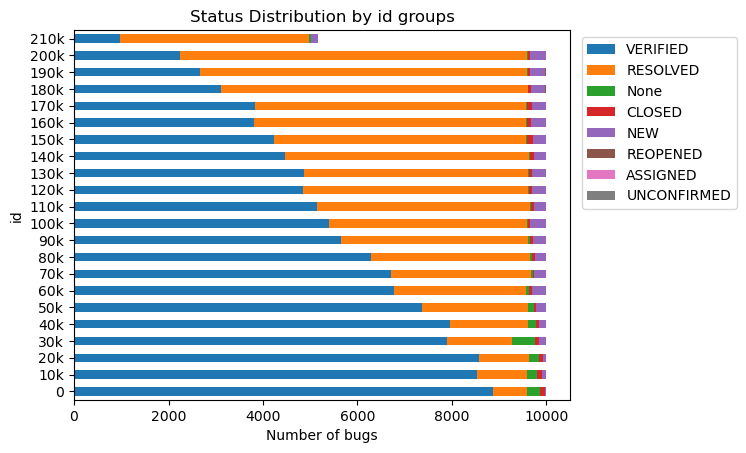

In [217]:
dfplot = pd.DataFrame.from_records(testing).set_index('id').reset_index()
dfplot.plot(x='id', kind='barh', stacked=True,
        title='Status Distribution by id groups')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.xlabel("Number of bugs")
plt.show()

In [218]:
# by id group, find the distribution of resolution
testing = []
for i,j in list(zip(list(np.arange(0,215173,10000)),(list(np.arange(0,215173,10000))+[215172+1])[1:])):
    pipeline = [
        {
            "$match": {
                'id': {"$gte":int(i), "$lt":int(j)}
            }
        },
        {
            "$group": {
                "_id": "$status_info.resolution",
                "count": { "$sum": 1 }
            }
        },
        {
            "$project": {
                "_id": 0,
                "val": "$_id",
                "count": 1
            }
        }
    ]

    tmp = list(Tracking2.aggregate(pipeline))
    tmp = {x['val']:x['count'] for x in tmp}
    tmp = dict(sorted(tmp.items(), key = lambda x: x[1], reverse = True))
    
    tmp['id'] = str(0) if i==0 else str(int(i/1000))+'k'

    testing.append(tmp)

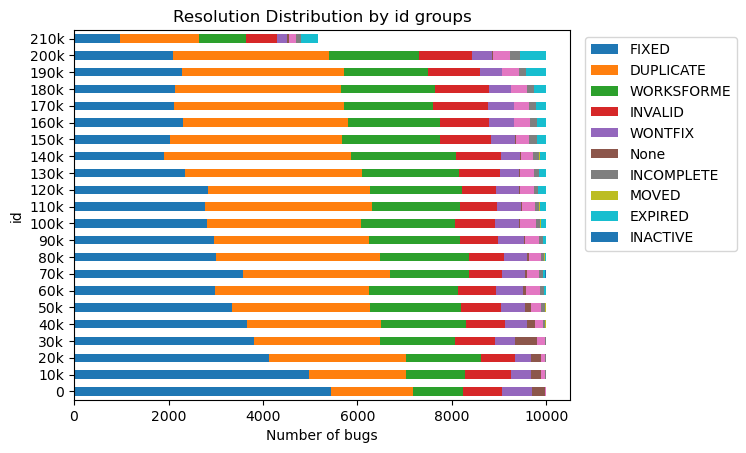

In [219]:
dfplot = pd.DataFrame.from_records(testing).set_index('id').reset_index()
dfplot.plot(x='id', kind='barh', stacked=True,
        title='Resolution Distribution by id groups')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.xlabel("Number of bugs")
plt.show()

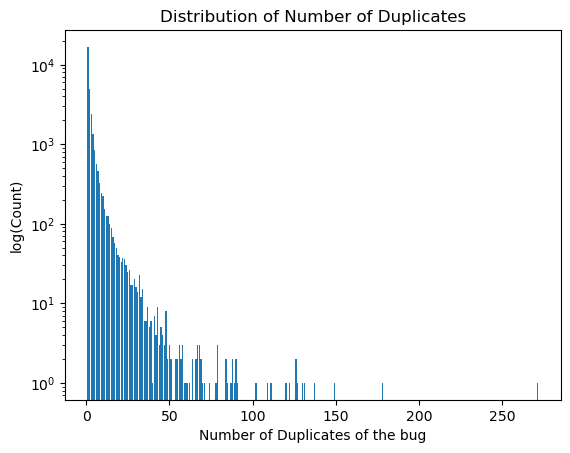

In [220]:
# find the overall distribution of number of duplicates
pipeline = [
    {
        "$match": {
            'status_info.duplicates': {"$exists": True}
        }
    },
    {
        "$project": {
            "_id": 0,
            "dup_size": { "$size": '$status_info.duplicates' },
            "count": 1
        }
    },
    {
        "$group": {
            "_id": "$dup_size",
            "count": { "$sum": 1 }
        }
    }
]

w = list(Tracking2.aggregate(pipeline))
w = {x['_id']: x['count'] for x in w}
w = dict(sorted(w.items(), key = lambda x: x[0]))

plt.bar(w.keys(), w.values())
plt.yscale('log')
plt.title('Distribution of Number of Duplicates')
plt.ylabel('log(Count)')
plt.xlabel('Number of Duplicates of the bug')
plt.show()

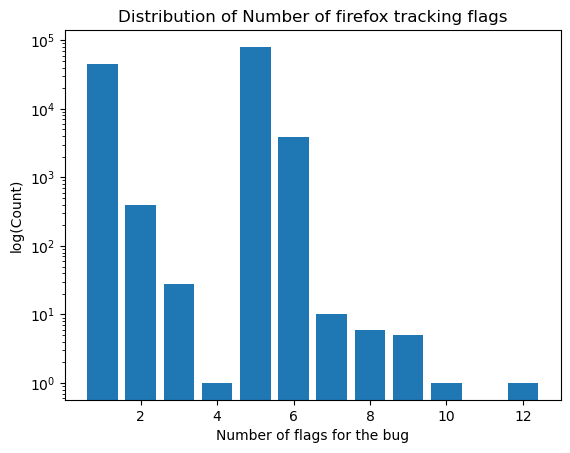

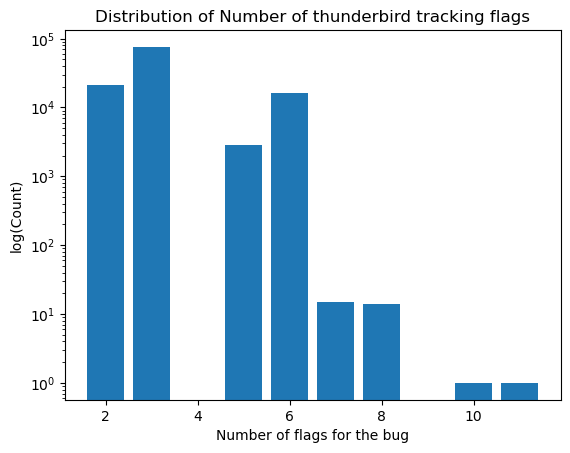

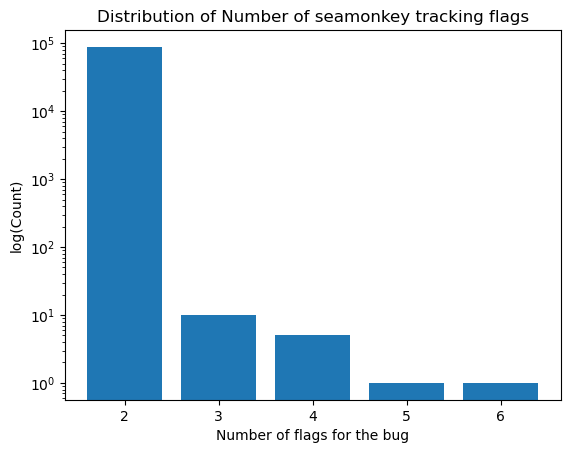

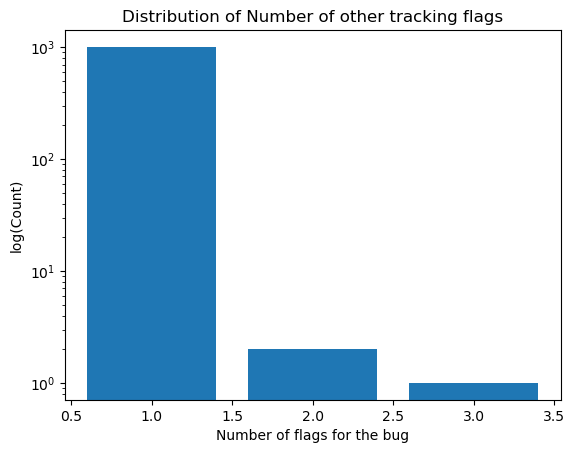

In [221]:
# for each product, find the overall distribution of number of tracking-flags
def plotTrackingFlag(product):

    pipeline = [
        {
            "$match": {
                'tracking_flags.'+product: {"$exists": True}
            }
        },
        {
            "$project": {
                "_id": 0,
                "dup_size": { "$size": '$tracking_flags.'+product },
                "count": 1
            }
        },
        {
            "$group": {
                "_id": "$dup_size",
                "count": { "$sum": 1 }
            }
        }
    ]

    f = list(Tracking2.aggregate(pipeline))
    f = {x['_id']: x['count'] for x in f}
    f = dict(sorted(f.items(), key = lambda x: x[0]))

    plt.bar(f.keys(), f.values())
    plt.yscale('log')
    plt.title('Distribution of Number of '+product+' tracking flags')
    plt.ylabel('log(Count)')
    plt.xlabel('Number of flags for the bug')
    plt.show()

plotTrackingFlag('firefox')
plotTrackingFlag('thunderbird')
plotTrackingFlag('seamonkey')
plotTrackingFlag('other')

In [213]:
# have a look on distinct value of target_milestone
pipeline = [
    {
        "$group": {
            "_id": "$target_milestone",
            "count": { "$sum": 1 }
        }
    },
    {
        "$project": {
            "_id": 0,
            "val": "$_id",
            "count": 1
        }
    }
]

tmp = list(Tracking2.aggregate(pipeline))
tmp = {x['val']:x['count'] for x in tmp}
tmp = dict(sorted(tmp.items(), key = lambda x: x[1], reverse = True))
tmp

{'---': 154502,
 'Future': 12320,
 'mozilla1.0': 2919,
 'M18': 2213,
 'M14': 2138,
 'M16': 1900,
 None: 1860,
 'mozilla0.9': 1729,
 'M15': 1690,
 'M17': 1566,
 'M11': 1548,
 'mozilla0.9.1': 1408,
 'mozilla0.9.9': 1283,
 'mozilla1.0.1': 1267,
 'mozilla1.2alpha': 1254,
 'M12': 1199,
 'M13': 1158,
 'M9': 914,
 'mozilla0.9.2': 873,
 'mozilla0.9.6': 870,
 'mozilla0.9.7': 861,
 'M10': 813,
 'mozilla1.1alpha': 795,
 'mozilla0.9.4': 791,
 'mozilla0.9.8': 783,
 'M7': 747,
 'Bugzilla 2.18': 691,
 'mozilla0.9.3': 668,
 'mozilla0.9.5': 629,
 'Bugzilla 2.16': 576,
 'mozilla1.2beta': 555,
 'M6': 526,
 'M4': 513,
 'mozilla0.8': 513,
 'mozilla1.4beta': 511,
 'mozilla1.4alpha': 501,
 'M8': 488,
 'mozilla1.3beta': 429,
 'mozilla1.3alpha': 392,
 'M5': 356,
 'Bugzilla old': 344,
 'psm2.2': 302,
 '3.4': 284,
 'mozilla1.5alpha': 260,
 'mozilla1.1beta': 256,
 'psm2.0': 220,
 'M3': 205,
 'mozilla1.4final': 205,
 'Bugzilla 2.12': 200,
 'psm2.1': 199,
 'M1': 176,
 'mozilla1.5beta': 169,
 'mozilla0.8.1': 159,
 '

In [214]:
# have a look on distinct value of iteration
pipeline = [
    {
        "$group": {
            "_id": "$cf_fx_iteration",
            "count": { "$sum": 1 }
        }
    },
    {
        "$project": {
            "_id": 0,
            "val": "$_id",
            "count": 1
        }
    }
]

tmp = list(Tracking2.aggregate(pipeline))
tmp = {x['val']:x['count'] for x in tmp}
tmp = dict(sorted(tmp.items(), key = lambda x: x[1], reverse = True))
tmp

{'---': 213311, None: 1860, '42.3 - Aug 10': 1}

In [254]:
# find the time needed from bug creation to resolved
def timeToResolve(unit='day'):
  pipeline = [
    {
      "$match":
        {
          "creation_time": {
            "$exists": True,
          },
          "cf_last_resolved": {
            "$exists": True,
          },
        },
    },
    {
      "$project":
        {
          "create": {
            "$dateFromString": {
              "dateString": "$creation_time",
            },
          },
          "end": {
            "$dateFromString": {
              "dateString": "$cf_last_resolved",
            },
          },
        },
    },
    {
      "$project":
        {
          "diff": {
            "$dateDiff": {
              "startDate": "$create",
              "endDate": "$end",
              "unit": unit,
            },
          },
        },
    },
    {
      "$group":
        {
          "_id": "$diff",
          "count": {
            "$sum": 1,
          },
        },
    },
  ]
  tmp = list(proj.aggregate(pipeline))
  tmp = {x['_id']:x['count'] for x in tmp}
  tmp = dict(sorted(tmp.items(), key = lambda x: x[0], reverse = False))
  return tmp

DaysToResolve = timeToResolve('day')
MonthsToResolve = timeToResolve('month')



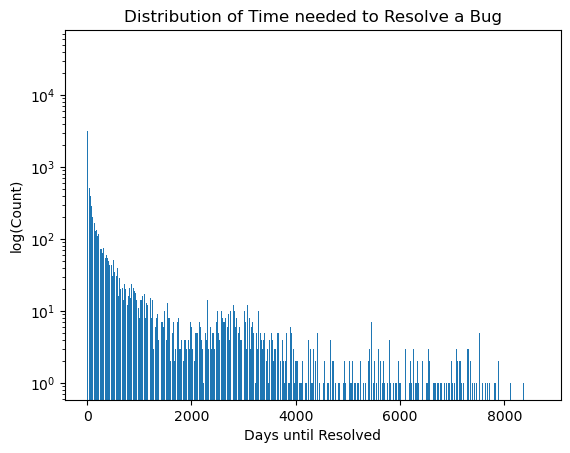

In [252]:
plt.bar(DaysToResolve.keys(), DaysToResolve.values())
plt.yscale('log')
plt.title('Distribution of Time needed to Resolve a Bug')
plt.ylabel('log(Count)')
plt.xlabel('Days until Resolved')
plt.show()

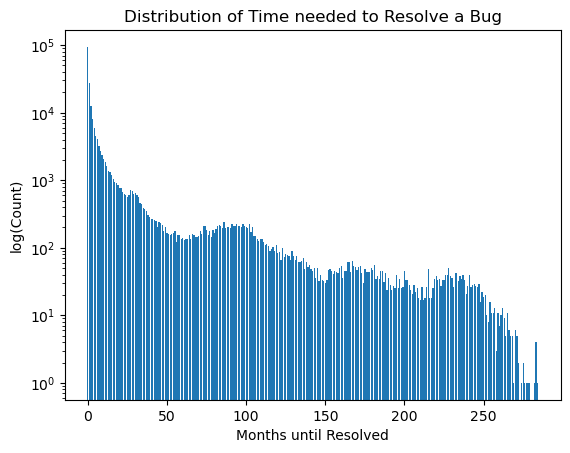

In [255]:
plt.bar(MonthsToResolve.keys(), MonthsToResolve.values())
plt.yscale('log')
plt.title('Distribution of Time needed to Resolve a Bug')
plt.ylabel('log(Count)')
plt.xlabel('Months until Resolved')
plt.show()